In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from wordcloud import WordCloud

In [57]:
# Define function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [60]:
# Path to the uploaded ZIP file
zip_path = "C:/Users/prath/Downloads/archive (2).zip"

In [61]:
# Extract and load CSV from ZIP
with zipfile.ZipFile(zip_path, 'r') as archive:
    archive.extractall("extracted_data")
    csv_filename = archive.namelist()[0]
    csv_path = os.path.join("extracted_data", csv_filename)

In [62]:
# Load CSV into DataFrame
df = pd.read_csv(csv_path, encoding='latin1')  # Specify encoding if needed

In [63]:
# Display the first few rows of the dataframe
print(df.head())

   'id' 'type'                                             'text'
0     1    ham                              Go until jurong point
1     2    ham                     Ok lar... Joking wif u oni...'
2     3   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3     4    ham  U dun say so early hor... U c already then say...
4     5    ham                   Nah I don't think he goes to usf


In [64]:

# Check for missing values
print(df.isnull().sum())



'id'      0
'type'    0
'text'    1
dtype: int64


In [67]:
# Check for duplicates
df = df.drop_duplicates()
print("Duplicates removed.")

Duplicates removed.


In [68]:
# Ensure the column names are correct
print("Available columns:", df.columns)

Available columns: Index([''id'', ''type'', ''text''], dtype='object')


In [72]:
# Display actual column names
print("Original columns:", df.columns)

# Rename columns dynamically based on actual names
if len(df.columns) == 2:
    df.columns = ['type', 'text']
elif len(df.columns) > 2:
    # If extra columns exist, drop them or rename them accordingly
    df = df.iloc[:, :2]  # Keep only the first two columns
    df.columns = ['type', 'text']

print("Renamed columns:", df.columns)


Original columns: Index([''id'', ''type'', ''text''], dtype='object')
Renamed columns: Index(['type', 'text'], dtype='object')


In [74]:
if 'type' in df.columns:
    print(df['type'].value_counts())
else:
    print("Column 'type' not found. Available columns:", df.columns)



type
310    1
1      1
2      1
3      1
4      1
      ..
26     1
27     1
28     1
29     1
30     1
Name: count, Length: 310, dtype: int64


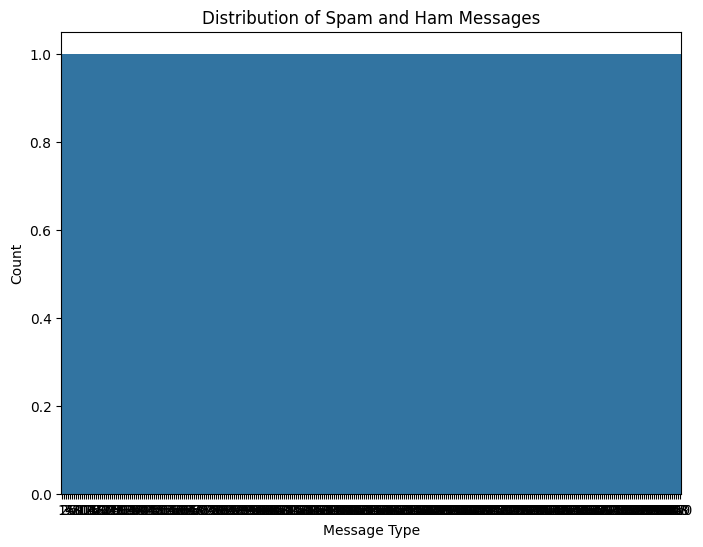

In [75]:
# Visualize the distribution of spam and ham messages
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [76]:
# Text length analysis
df['text_length'] = df['text'].apply(len)


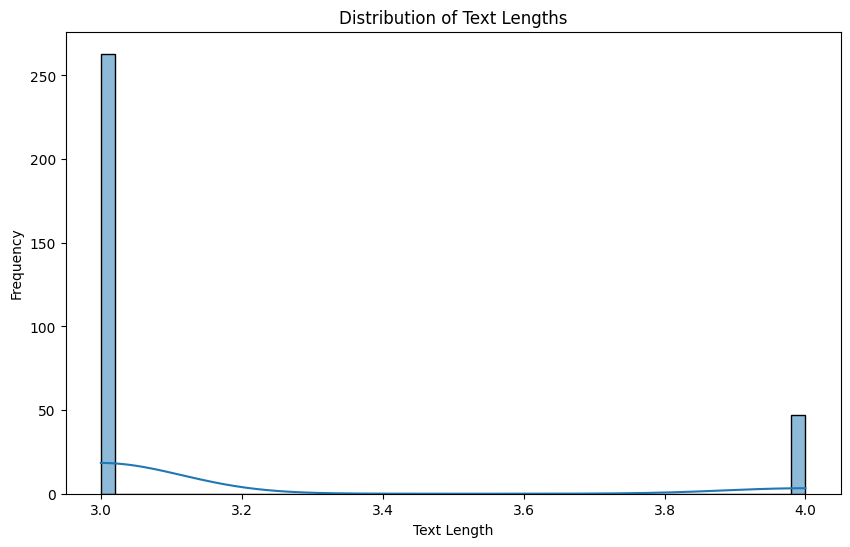

In [77]:
# Visualize the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

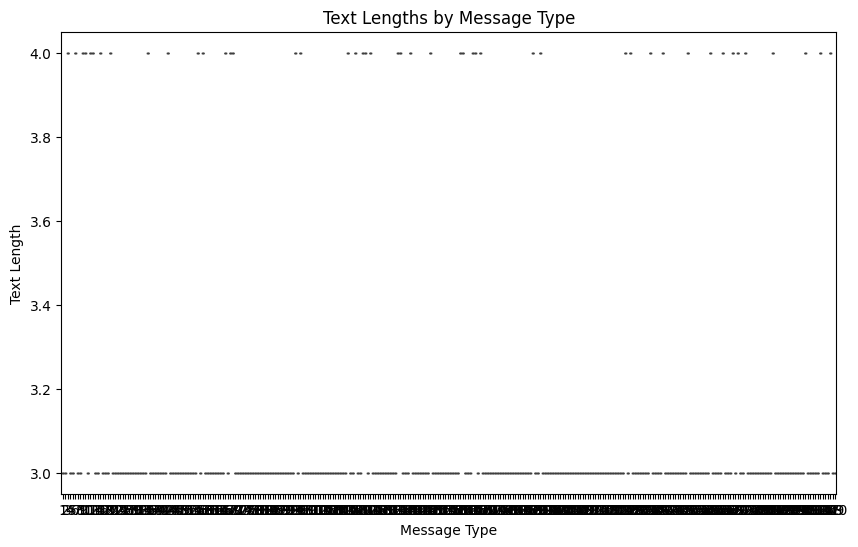

In [78]:
# Compare text lengths for spam and ham messages
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='text_length', data=df)
plt.title('Text Lengths by Message Type')
plt.xlabel('Message Type')
plt.ylabel('Text Length')
plt.show()


In [79]:
# Word count analysis
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

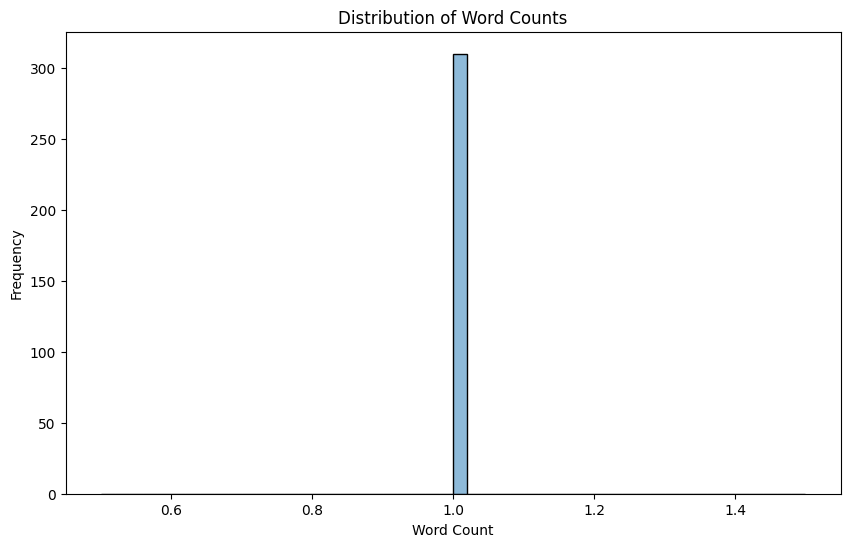

In [80]:
# Visualize the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [86]:
print("Available columns:", df.columns)


Available columns: Index(['type', 'text', 'text_length', 'word_count'], dtype='object')


In [82]:
print("Unique values in 'type' column:", df['type'].unique())


Unique values in 'type' column: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 23

In [84]:
spam_df = df[df['type'] == 'spam']

if spam_df.empty:
    print("No spam messages found!")
else:
    spam_text = ' '.join(spam_df['text'])
    generate_word_cloud(spam_text, 'Word Cloud for Spam Messages')


No spam messages found!
